In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from datetime import datetime
from citipy import citipy

# Import API Key
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

norman wells ca
zhigansk ru
kibre mengist et
ushuaia ar
qaanaaq gl
lethem gy
gamba ga
xining cn
hobart au
gornozavodsk ru
kapaa us
mataura pf
mar del plata ar
dikson ru
rorvik no
kushiro jp
clyde river ca
punta arenas cl
kendari id
bluff nz
ratangarh in
wajir ke
belushya guba ru
ilulissat gl
albany au
ostrovnoy ru
nizhneyansk ru
vaini to
purpe ru
bairiki ki
atuona pf
geraldton au
byron bay au
frontera mx
georgetown sh
bambous virieux mu
tucurui br
karlskrona se
yellowknife ca
payo ph
south venice us
enumclaw us
kirksville us
lazaro cardenas mx
porbandar in
ushuaia ar
ancud cl
kloulklubed pw
bredasdorp za
port elizabeth za
kodiak us
rikitea pf
bredasdorp za
ust-kuyga ru
saldanha za
verkhnevilyuysk ru
sungaipenuh id
illoqqortoormiut gl
turhal tr
aksu cn
ucluelet ca
mar del plata ar
torquay gb
port alfred za
bredasdorp za
bredasdorp za
praia da vitoria pt
san patricio mx
dandong cn
khatanga ru
wajima jp
punta arenas cl
klaksvik fo
albany au
mataura pf
guerrero negro mx
doctor arroyo mx
bu

cape town za
vaitupu wf
kodiak us
hobart au
busselton au
guasdualito ve
gazanjyk tm
hobart au
cape town za
kaitangata nz
khatanga ru
ruatoria nz
kargasok ru
albany au
kigorobya ug
yellowknife ca
leningradskiy ru
zhezkazgan kz
tessalit ml
hermanus za
punta arenas cl
okha ru
nichinan jp
kapaa us
calabar ng
barrow us
albany au
mys shmidta ru
mataura pf
leningradskiy ru
torbay ca
castro cl
macaboboni ph
kavieng pg
rikitea pf
chenzhou cn
aklavik ca
clyde river ca
mocambique mz
esperance au
pangody ru
sicamous ca
itarema br
derzhavinsk kz
leningradskiy ru
balabac ph
aras no
kamenskoye ru
saldanha za
victoria sc
port hawkesbury ca
itarema br
joshimath in
bluff nz
busselton au
hithadhoo mv
jamestown sh
vanimo pg
ushuaia ar
caravelas br
dekernes eg
thompson ca
albany au
rikitea pf
zhigansk ru
fortuna us
albany au
coquimbo cl
marienburg sr
castro cl
duz tn
cayenne gf
bandarbeyla so
nizhneyansk ru
kapaa us
nikolskoye ru
barrow us
bengkulu id
atuona pf
tuktoyaktuk ca
attawapiskat ca
college us
kap

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | kibre mengist
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | lethem
Processing Record 7 of Set 1 | gamba
Processing Record 8 of Set 1 | xining
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | gornozavodsk
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | rorvik
Processing Record 16 of Set 1 | kushiro
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | kendari
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ratangarh
Processing Record 22 of Set 1 | wajir
Processing Record 23 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 24 of Set 1 | il

Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | gillette
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | biscarrosse
Processing Record 47 of Set 4 | moshkovo
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | tarudant
City not found. Skipping...
Processing Record 1 of Set 5 | tabialan
City not found. Skipping...
Processing Record 2 of Set 5 | creetown
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | gat
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | barranca
Processing Record 9 of Set 5 | zelenoborsk
Processing Record 10 of Set 5 | upernavik
Processing Record 11 of Set 5 | longyearbyen
Processing Record 12 of Set 5 | maniitsoq
Processing Record 13 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 5 | isange

Processing Record 28 of Set 8 | eenhana
Processing Record 29 of Set 8 | hailakandi
Processing Record 30 of Set 8 | kavieng
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | atherton
Processing Record 33 of Set 8 | armidale
Processing Record 34 of Set 8 | altay
Processing Record 35 of Set 8 | moa
Processing Record 36 of Set 8 | westport
Processing Record 37 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 8 | guasdualito
Processing Record 39 of Set 8 | gazanjyk
Processing Record 40 of Set 8 | kargasok
Processing Record 41 of Set 8 | kigorobya
Processing Record 42 of Set 8 | leningradskiy
Processing Record 43 of Set 8 | zhezkazgan
Processing Record 44 of Set 8 | okha
Processing Record 45 of Set 8 | nichinan
Processing Record 46 of Set 8 | calabar
Processing Record 47 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 48 of Set 8 | chenzhou
Processing Record 49 of Set 8 | mocambique
City not found. Skipping...
Processi

Processing Record 12 of Set 12 | fairbanks
Processing Record 13 of Set 12 | huichapan
Processing Record 14 of Set 12 | anadyr
Processing Record 15 of Set 12 | sibolga
Processing Record 16 of Set 12 | neiafu
Processing Record 17 of Set 12 | porto novo
Processing Record 18 of Set 12 | swellendam
Processing Record 19 of Set 12 | wagar
Processing Record 20 of Set 12 | zatoka
Processing Record 21 of Set 12 | raychikhinsk
Processing Record 22 of Set 12 | aliwal north
Processing Record 23 of Set 12 | hays
Processing Record 24 of Set 12 | sena madureira
Processing Record 25 of Set 12 | chara
Processing Record 26 of Set 12 | laon
Processing Record 27 of Set 12 | payson
Processing Record 28 of Set 12 | ulverstone
Processing Record 29 of Set 12 | grao mogol
Processing Record 30 of Set 12 | nelson bay
Processing Record 31 of Set 12 | miles city
Processing Record 32 of Set 12 | chalmette
Processing Record 33 of Set 12 | gusau
Processing Record 34 of Set 12 | melenki
Processing Record 35 of Set 12 |

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,-27.36,68,20,0.00,CA,2022-01-29 12:10:55
1,Zhigansk,66.7697,123.3711,-10.61,98,96,12.66,RU,2022-01-29 12:10:56
2,Kibre Mengist,5.8833,38.9833,85.91,11,64,6.33,ET,2022-01-29 12:10:56
3,Ushuaia,-54.8000,-68.3000,58.62,72,0,11.50,AR,2022-01-29 12:10:56
4,Qaanaaq,77.4840,-69.3632,-12.46,57,60,8.63,GL,2022-01-29 12:10:57
5,Lethem,3.3803,-59.7968,76.82,69,89,14.03,GY,2022-01-29 12:10:57
6,Gamba,-2.6500,10.0000,83.50,66,68,8.75,GA,2022-01-29 12:10:58
7,Xining,36.6167,101.7667,17.67,57,0,3.02,CN,2022-01-29 12:09:04
8,Hobart,-42.8794,147.3294,64.02,73,75,4.61,AU,2022-01-29 12:10:29
9,Gornozavodsk,58.3758,58.3211,17.82,90,100,6.87,RU,2022-01-29 12:10:58


In [10]:
# Reorder Columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

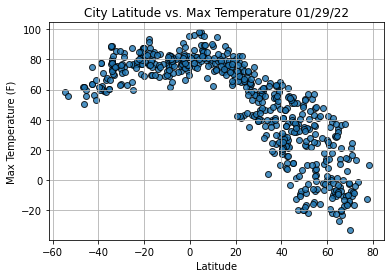

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

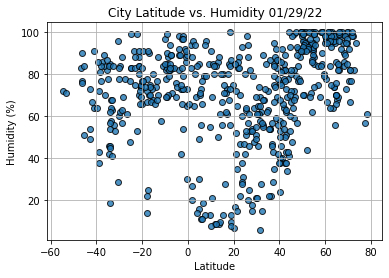

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

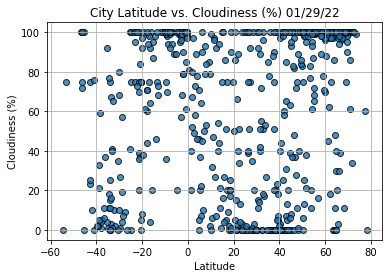

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

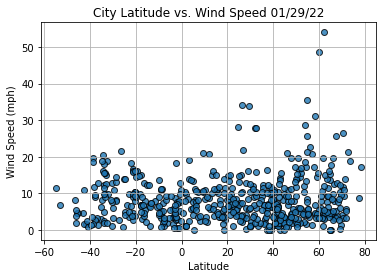

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
547     True
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

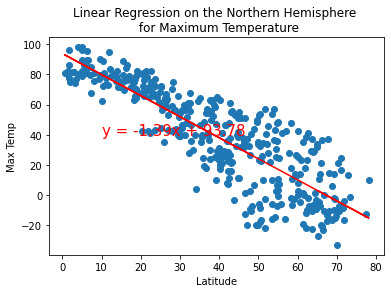

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

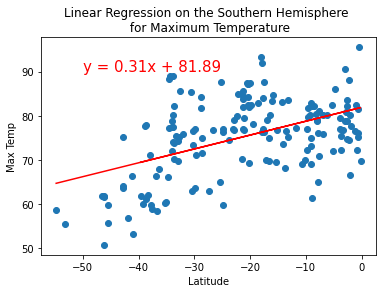

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

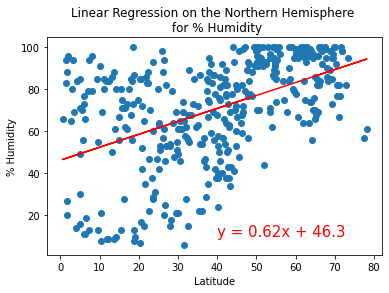

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

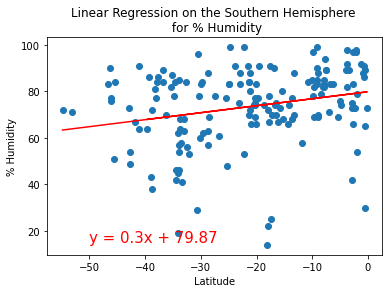

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

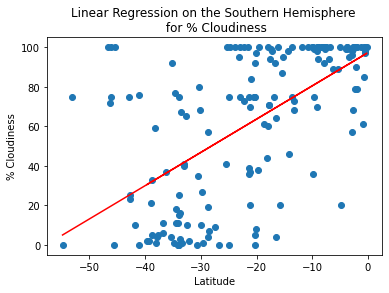

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

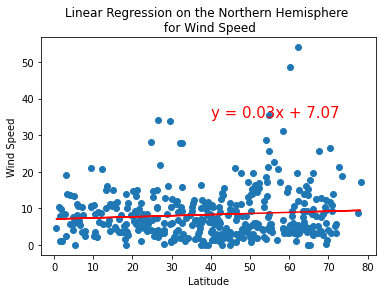

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

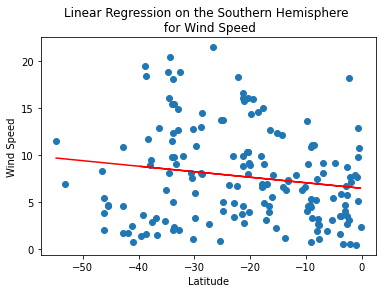

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))